Breadth First Search
====


This type of searches used for tree based data structures. In Breadth First Search method, seaches are for same depth for each loop. It means search made level by level.

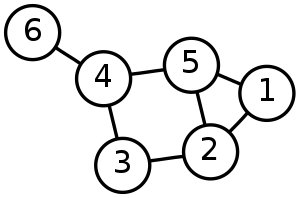

One of the search combination might be "1-2-5-3-4-6".

In [1]:
// BFS algorithm in C

#include <stdio.h>
#include <stdlib.h>
#define SIZE 40

struct queue {
  int items[SIZE];
  int front;
  int rear;
};

struct queue* createQueue();
void enqueue(struct queue* q, int);
int dequeue(struct queue* q);
void display(struct queue* q);
int isEmpty(struct queue* q);
void printQueue(struct queue* q);

struct node {
  int vertex;
  struct node* next;
};

struct node* createNode(int);

struct Graph {
  int numVertices;
  struct node** adjLists;
  int* visited;
};

// BFS algorithm
void bfs(struct Graph* graph, int startVertex) {
  struct queue* q = createQueue();

  graph->visited[startVertex] = 1;
  enqueue(q, startVertex);

  while (!isEmpty(q)) {
    printQueue(q);
    int currentVertex = dequeue(q);
    printf("Visited %d\n", currentVertex);

    struct node* temp = graph->adjLists[currentVertex];

    while (temp) {
      int adjVertex = temp->vertex;

      if (graph->visited[adjVertex] == 0) {
        graph->visited[adjVertex] = 1;
        enqueue(q, adjVertex);
      }
      temp = temp->next;
    }
  }
}

// Creating a node
struct node* createNode(int v) {
  struct node* newNode = malloc(sizeof(struct node));
  newNode->vertex = v;
  newNode->next = NULL;
  return newNode;
}

// Creating a graph
struct Graph* createGraph(int vertices) {
  struct Graph* graph = malloc(sizeof(struct Graph));
  graph->numVertices = vertices;

  graph->adjLists = malloc(vertices * sizeof(struct node*));
  graph->visited = malloc(vertices * sizeof(int));

  int i;
  for (i = 0; i < vertices; i++) {
    graph->adjLists[i] = NULL;
    graph->visited[i] = 0;
  }

  return graph;
}

// Add edge
void addEdge(struct Graph* graph, int src, int dest) {
  // Add edge from src to dest
  struct node* newNode = createNode(dest);
  newNode->next = graph->adjLists[src];
  graph->adjLists[src] = newNode;

  // Add edge from dest to src
  newNode = createNode(src);
  newNode->next = graph->adjLists[dest];
  graph->adjLists[dest] = newNode;
}

// Create a queue
struct queue* createQueue() {
  struct queue* q = malloc(sizeof(struct queue));
  q->front = -1;
  q->rear = -1;
  return q;
}

// Check if the queue is empty
int isEmpty(struct queue* q) {
  if (q->rear == -1)
    return 1;
  else
    return 0;
}

// Adding elements into queue
void enqueue(struct queue* q, int value) {
  if (q->rear == SIZE - 1)
    printf("\nQueue is Full!!");
  else {
    if (q->front == -1)
      q->front = 0;
    q->rear++;
    q->items[q->rear] = value;
  }
}

// Removing elements from queue
int dequeue(struct queue* q) {
  int item;
  if (isEmpty(q)) {
    printf("Queue is empty\n");
    item = -1;
  } else {
    item = q->items[q->front];
    q->front++;
    if (q->front > q->rear) {
      printf("Resetting queue \n");
      q->front = q->rear = -1;
    }
  }
  return item;
}

// Print the queue
void printQueue(struct queue* q) {
  int i = q->front;

  if (isEmpty(q)) {
    printf("Queue is empty");
  } else {
    printf("\nQueue contains \n");
    for (i = q->front; i < q->rear + 1; i++) {
      printf("%d ", q->items[i]);
    }
    printf("\n");
  }
}

int main() {
  struct Graph* graph = createGraph(6);
  addEdge(graph, 1, 2);
  addEdge(graph, 1, 5);
  addEdge(graph, 2, 5);
  addEdge(graph, 5, 4);
  addEdge(graph, 2, 3);
  addEdge(graph, 4, 3);
  addEdge(graph, 4, 6);

  bfs(graph, 4);

  return 0;
}


Queue contains 
4 
Resetting queue 
Visited 4

Queue contains 
3 5 
Visited 3

Queue contains 
5 2 
Visited 5

Queue contains 
2 1 
Visited 2

Queue contains 
1 
Resetting queue 
Visited 1
